# Utils

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Problem: regression

We will approximate of a point cloud following a linear function : $f(x) = 3x + 0.5$

We begin by defining the $f$ function

In [0]:
f = lambda x: 3 * x + 0.5

Dataset contains $m$ training examples, target values are $y = f(x) + b()$, where $b$ is gaussian noise

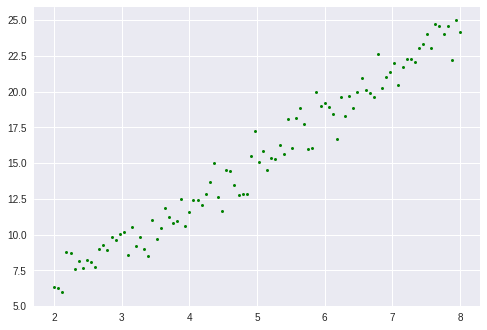

In [3]:
m = 100
x = np.linspace(2, 8, m)
y = f(x) + np.random.normal(0, 1, m)

_ = plt.plot(x, y, 'go', markersize=3)

# Method

We approximate this point cloud with a linear function $h(x) = \theta_0 + \theta_1 \cdot x, \quad \theta_0, \theta_1 \in \mathbb{R} $

In [0]:
th0 = 0
th1 = 0

h = lambda x: th0 + th1 * x

We set our loss function:



> $L(\theta_0, \theta_1) = \frac {1}{2m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)})^2 = \frac {1}{2m}\sum_{0}^{m}(\theta_0 + \theta_1 \cdot x^{(i)} - y^{(i)})^2 $

In [0]:
getLoss = lambda : sum( (h(x) - y) * (h(x) - y) ) / (2 * m)

**Gradient descent gives**


> $\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} L(\theta_0, \theta_1) $

In [0]:
def gradient_descent(alpha):
  new_th0 = th0 - alpha * dL_0(x, y)
  new_th1 = th1 - alpha * dL_1(x, y)
  
  return (new_th0, new_th1)

Where we have to compute:

> $\frac{\partial}{\partial \theta_0} L(\theta_0, \theta_1) = \frac {1}{m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)}) $

> $\frac{\partial}{\partial \theta_1} L(\theta_0, \theta_1) = \frac {1}{m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)}) \cdot x^{(i)} $

In [0]:
dL_0 = lambda x, y: sum( h(x) - y ) / m
dL_1 = lambda x, y: sum( (h(x) - y)*x ) / m

# Training

We set $alpha$ to a small value, and run the descent $epochs$ time

In [0]:
alpha = 0.01
epochs = 100

loss: 0.4923


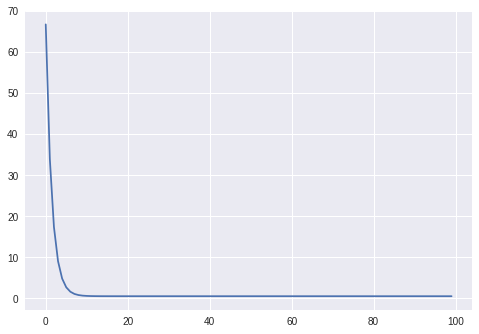

In [9]:
loss_history = np.zeros(epochs)

for i_epoch in range(epochs):
  th0, th1 = gradient_descent(alpha)
  loss_history[i_epoch] = getLoss()

_ = plt.plot(loss_history)
print("loss: {:.4f}".format(loss_history[-1]))

# Testing

h(x) = 0.49422485490742196 + 2.9682333734243 * x


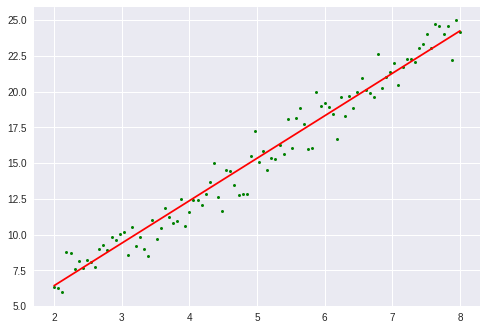

In [10]:
_ = plt.plot(x, y, 'go', markersize=3)
_ = plt.plot(x, h(x), 'r-')

print("h(x) = {} + {} * x".format(th0, th1))